<a href="https://colab.research.google.com/github/ji0-k/AI_26/blob/main/03__03%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 특성 공학
# 여러 특성을 사용한 다중회귀에 대해서 알아보자.
# 다항 회귀로는 농어의 무게를 어느정도인지 짐작할 수는 있지만 과소적합
# 과소적합을 해결하려면 제곱보다 더 고차항을 넣어야 함
# -> 길이 + 무게 + 높이 + 두께 등....

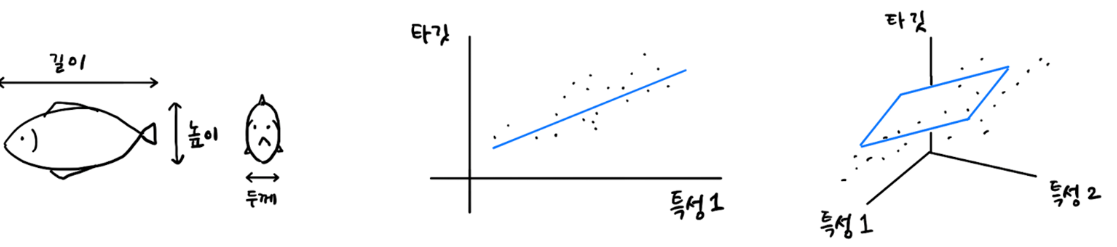

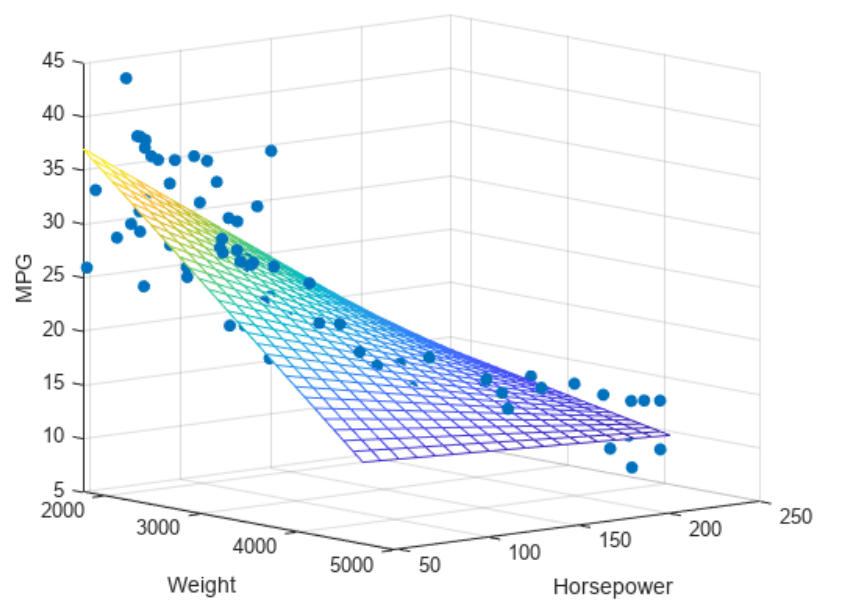

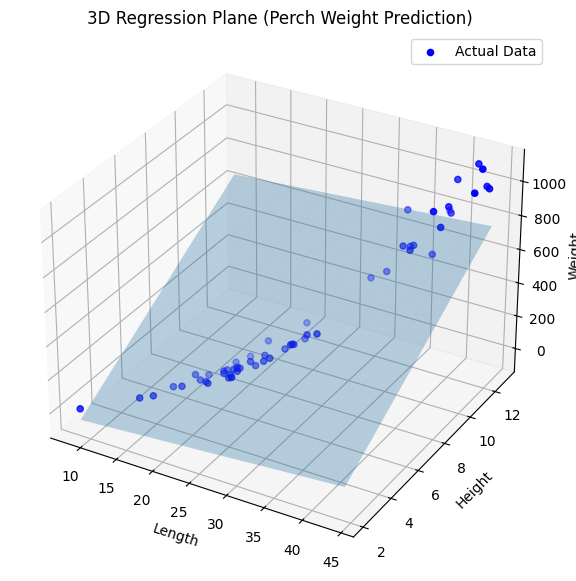

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression # 특성공학을 위한 도구

# ----------------------------
# 1. 입력 데이터
# length, height, width
#   길이,   높이,   너비,
# ----------------------------
data = np.array([
 [8.4,2.11,1.41],[13.7,3.53,2.0],[15.0,3.82,2.43],[16.2,4.59,2.63],
 [17.4,4.59,2.94],[18.0,5.22,3.32],[18.7,5.2,3.12],[19.0,5.64,3.05],
 [19.6,5.14,3.04],[20.0,5.08,2.77],[21.0,5.69,3.56],[21.0,5.92,3.31],
 [21.0,5.69,3.67],[21.3,6.38,3.53],[22.0,6.11,3.41],[22.0,5.64,3.52],
 [22.0,6.11,3.52],[22.0,5.88,3.52],[22.0,5.52,4.0],[22.5,5.86,3.62],
 [22.5,6.79,3.62],[22.7,5.95,3.63],[23.0,5.22,3.63],[23.5,6.28,3.72],
 [24.0,7.29,3.72],[24.0,6.38,3.82],[24.6,6.73,4.17],[25.0,6.44,3.68],
 [25.6,6.56,4.24],[26.5,7.17,4.14],[27.3,8.32,5.14],[27.5,7.17,4.34],
 [27.5,7.05,4.34],[27.5,7.28,4.57],[28.0,7.82,4.2],[28.7,7.59,4.64],
 [30.0,7.62,4.77],[32.8,10.03,6.02],[34.5,10.26,6.39],[35.0,11.49,7.8],
 [36.5,10.88,6.86],[36.0,10.61,6.74],[37.0,10.84,6.26],[37.0,10.57,6.37],
 [39.0,11.14,7.49],[39.0,11.14,6.0],[39.0,12.43,7.35],[40.0,11.93,7.11],
 [40.0,11.73,7.22],[40.0,12.38,7.46],[40.0,11.14,6.63],[42.0,12.8,6.87],
 [43.0,11.93,7.28],[43.0,12.51,7.42],[43.5,12.6,8.14],[44.0,12.49,7.6]
])

perch_weight = np.array([
 5.9,32.0,40.0,51.5,70.0,100.0,78.0,80.0,85.0,85.0,
 110.0,115.0,125.0,130.0,120.0,120.0,130.0,135.0,110.0,
 130.0,150.0,145.0,150.0,170.0,225.0,145.0,188.0,180.0,
 197.0,218.0,300.0,260.0,265.0,250.0,250.0,300.0,320.0,
 514.0,556.0,840.0,685.0,700.0,700.0,690.0,900.0,650.0,
 820.0,850.0,900.0,1015.0,820.0,1100.0,1000.0,1100.0,
 1000.0,1000.0
])

length = data[:,0]
height = data[:,1]
width = data[:,2]

# ----------------------------
# 2. 모델 학습 (3개 특성 사용)
# ----------------------------
X = np.column_stack((length, height, width))
model = LinearRegression()
model.fit(X, perch_weight)

# ----------------------------
# 3. 회귀 평면 생성 (length, height 기준)
# ----------------------------
l_range = np.linspace(length.min(), length.max(), 30)
h_range = np.linspace(height.min(), height.max(), 30)
L, H = np.meshgrid(l_range, h_range)

# width는 평균값으로 고정
W = np.full(L.shape, width.mean())

Z = model.predict(np.column_stack((L.ravel(), H.ravel(), W.ravel())))
Z = Z.reshape(L.shape)

# ----------------------------
# 4. 시각화
# ----------------------------
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 실제 데이터
ax.scatter(length, height, perch_weight, color='blue', label='Actual Data')

# 회귀 평면
ax.plot_surface(L, H, Z, alpha=0.3)

ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D Regression Plane (Perch Weight Prediction)')

plt.legend()
plt.show()
# 점 = 실제 물고기 데이터
# 평면 = 모델이 학습한 예측 공간

In [ ]:
#----------------------------------참고용
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. 데이터 준비 (판다스를 이용해 데이터를 가져옵니다)
# 데이터 출처나 변수명이 따로 있다면 알려주세요!
df = pd.read_csv('https://bit.ly/fish_csv_data')
fish_full = df[['length', 'height', 'width']].to_numpy() # 특성: 길이, 높이, 두께
fish_weight = df['weight'].to_numpy() # 타겟: 무게

# 2. 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    fish_full, fish_weight, random_state=42)

# 3. 특성 공학 적용 (PolynomialFeatures 사용)
poly = PolynomialFeatures(include_bias=False) # 절편을 위한 특성을 제외하고 생성
poly.fit(train_input)
train_poly = poly.transform(train_input) # 특성을 제곱하거나 서로 곱해서 늘립니다
test_poly = poly.transform(test_input)

# 4. 모델 학습
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 결과 확인
print(f"훈련 세트 점수: {lr.score(train_poly, train_target)}")
print(f"테스트 세트 점수: {lr.score(test_poly, test_target)}")

#----------------------------------참고용

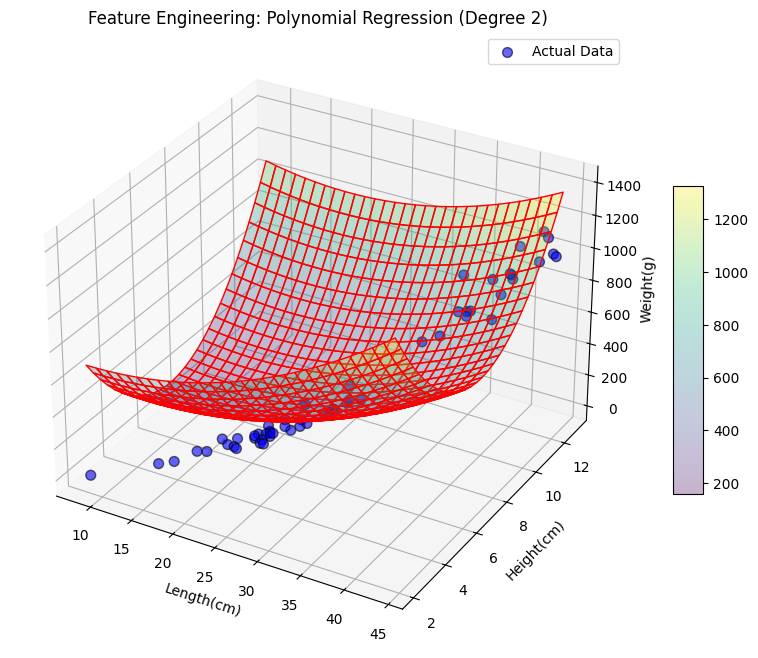

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3차원 그래프를 위한 툴킷 (구버전 호환 및 명시적 선언)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # 특성공학을 위한도구

# 1. 데이터 준비
# length, height, width

data = np.array([
 [8.4,2.11,1.41],[13.7,3.53,2.0],[15.0,3.82,2.43],[16.2,4.59,2.63],
 [17.4,4.59,2.94],[18.0,5.22,3.32],[18.7,5.2,3.12],[19.0,5.64,3.05],
 [19.6,5.14,3.04],[20.0,5.08,2.77],[21.0,5.69,3.56],[21.0,5.92,3.31],
 [21.0,5.69,3.67],[21.3,6.38,3.53],[22.0,6.11,3.41],[22.0,5.64,3.52],
 [22.0,6.11,3.52],[22.0,5.88,3.52],[22.0,5.52,4.0],[22.5,5.86,3.62],
 [22.5,6.79,3.62],[22.7,5.95,3.63],[23.0,5.22,3.63],[23.5,6.28,3.72],
 [24.0,7.29,3.72],[24.0,6.38,3.82],[24.6,6.73,4.17],[25.0,6.44,3.68],
 [25.6,6.56,4.24],[26.5,7.17,4.14],[27.3,8.32,5.14],[27.5,7.17,4.34],
 [27.5,7.05,4.34],[27.5,7.28,4.57],[28.0,7.82,4.2],[28.7,7.59,4.64],
 [30.0,7.62,4.77],[32.8,10.03,6.02],[34.5,10.26,6.39],[35.0,11.49,7.8],
 [36.5,10.88,6.86],[36.0,10.61,6.74],[37.0,10.84,6.26],[37.0,10.57,6.37],
 [39.0,11.14,7.49],[39.0,11.14,6.0],[39.0,12.43,7.35],[40.0,11.93,7.11],
 [40.0,11.73,7.22],[40.0,12.38,7.46],[40.0,11.14,6.63],[42.0,12.8,6.87],
 [43.0,11.93,7.28],[43.0,12.51,7.42],[43.5,12.6,8.14],[44.0,12.49,7.6]
])

perch_weight = np.array([
 5.9,32.0,40.0,51.5,70.0,100.0,78.0,80.0,85.0,85.0,
 110.0,115.0,125.0,130.0,120.0,120.0,130.0,135.0,110.0,
 130.0,150.0,145.0,150.0,170.0,225.0,145.0,188.0,180.0,
 197.0,218.0,300.0,260.0,265.0,250.0,250.0,300.0,320.0,
 514.0,556.0,840.0,685.0,700.0,700.0,690.0,900.0,650.0,
 820.0,850.0,900.0,1015.0,820.0,1100.0,1000.0,1100.0,
 1000.0,1000.0
])

# X: [길이, 높이, 두께], y: 무게
X = np.column_stack((length, height, width))
y = perch_weight


# 2. 특성 공학 (Feature Engineering) 적용

poly = PolynomialFeatures(degree=2, include_bias=False)
# PolynomialFeatures는 기존 특성을 조합해 새로운 '고차항' 특성을 만듭니다.
# degree=2 설정 시: [a, b, c] -> [a, b, c, a^2, b^2, c^2, ab, bc, ca] 로 확장됨

X_poly = poly.fit_transform(X)
# 학습 데이터를 2차항 형태의 '다항식'으로 변환

# 3. 모델 학습
model_poly = LinearRegression()
model_poly.fit(X_poly, y) # 변환된(특성이 늘어난) 데이터로 학습 진행

# 4. 시각화를 위한 그리드(예측 곡면 데이터) 생성 : 회귀곡면용
l_range = np.linspace(length.min(), length.max(), 30)
h_range = np.linspace(height.min(), height.max(), 30)
L, H = np.meshgrid(l_range, h_range)


W_mean = width.mean()
# 너비(Width)는 평균값으로 고정하여 3차원 시각화 구현을위해 상수로 고정

grid_points = np.column_stack((L.ravel(), H.ravel(), np.full(L.ravel().shape, W_mean)))
# 예측을 위해 그리드 데이터를 [L, H, W_mean] 형태로 정렬

grid_poly = poly.transform(grid_points)
# 그리드 데이터에도 동일하게 '특성 공학(2차항)' 적용 필수!
Z = model_poly.predict(grid_poly) # 예측값 계산
Z = Z.reshape(L.shape)


# 5. 3D시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Axes3D가 내부적으로 이 projection을 처리함

# 실제 데이터 점(산점도)
ax.scatter(length, height, y, color='blue', label='Actual Data', alpha=0.6,s = 50,
           edgecolor='black')

# s	       Size	점의 크기 (기본값은 보통 20)
# c(color) Color	점의 색상 ('red', 'blue', '#000000' 등)
# marker	 Shape	점의 모양 ('o': 원, '^': 삼각형, 's': 사각형 등)
# alpha	   Transparency	투명도 (0: 완전 투명 ~ 1: 불투명)
# edgecolor	Edge Color	점 테두리의 색상

# 특성 공학으로 만들어진 예측 곡면 (Surface)
# 평면(Linear)이 아니라 굽어진 곡면(Polynomial)
surf = ax.plot_surface(L, H, Z, color='red', alpha=0.3, cmap='viridis')

ax.set_xlabel('Length(cm)')
ax.set_ylabel('Height(cm)')
ax.set_zlabel('Weight(g)')
ax.set_title('Feature Engineering: Polynomial Regression (Degree 2)')

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# 무게 변화에 따른 색상 바 추가
plt.legend()
plt.show()

In [14]:
# 다중회귀 : 여러개의 특성을 사용한 선형회귀

# 농어의 길이 뿐만 아니라 농어의 높이와 두께도 특성에 포함 하겠다. (특성3개)
# 3개의 특성을 제곱하여 추가해야 한다.
# 각 특성을 서로 곱해서 또 다른 특성을 만들수 있다.
# 이런 특성을 사용해서 새로운 특성을 뽑아내는 것을 특성공학이라고 함

# 데이터 준비 -> 판다스에서 제공하는 데이터 프레임을 사용해보자.
# 판다스 : 데이터분석용 라이브러리임 (csv -> 배열로)
# csv 파일은 엑셀에서 텍스트를 뽑아낸 메모장 파일

# pip install pandas 파이참에서 판다스 설치 필수
import pandas as pd
# 다중 회귀 : 물고기의 길이와 무게도 있지만 너비도 존재하니
# 더 자세한 회귀가 도출 될꺼야 (3차원 공간을 형성함)

df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()# csv 파일을 가져와 넘파이 배열로 변경
print(perch_full) # perch_full 3개의 특성을 가진 배열 값

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [17]:
import numpy as np

# 무게 타깃 (정답파일용)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42)
# 훈련세트와 테스트세트로 나눔
print(train_input[0], train_target[0])
# 판다스에서 받은데이터 [length, height, width] weight
#                        [19.6   5.14    3.04]   85.0

[19.6   5.14  3.04] 85.0


In [18]:
print(train_input.shape, test_input.shape)
# 훈련용 42개의 농어와 3개의 특성
# 테스트 14개의 농어와 3개의 특성

(42, 3) (14, 3)


In [19]:
# 위 데이터를 사용해서 새로운 특성을 만들겠다.!!!
# 사이킷런 변환기 : 특성을 만들거나 전처리하는 클래스가 있다.
# 변환기(Transformer) : fit(), transform() 메서드가 있다.

from sklearn.preprocessing import PolynomialFeatures # 특성변환기
# 전에는 제곱을 이용해서 특성을 변경하여 곡선으로 만들었음!!
# PolynomialFeatures 사이킷런에서 수학자들이 만든 공식을 사용해봄.


poly = PolynomialFeatures()
poly.fit([[2, 3]])
# 2개의 특성을 가진 2와 3으로 이루어진 샘플 하나를 적용 테스트
print(poly.transform([[2, 3]]))
# fit() 메서드와 transform() 메서드를 차례대로 실행(훈련을 해야 변환이 됨)

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# [[1. 2. 3. 4. 6. 9.]]
# 1 (bias)
# 2     # fit에 첫번째 값
# 3     # fit에 두번째 값
# 4 = 2 ** 2
# 6 = 2 * 3
# 9 = 3 ** 2

# PolynomialFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고
# 특성끼리 서로 곱한 항을 추가함
# 2와 3을 각기 제곱한 4와 9가 추가 되고, 2와 3을 곱한 6이 추가됨
# 무게 = a * 길이 + b * 높이 + c * 두께 + d + 1
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수임 -> (길이, 높이, 두께, 1)

In [ ]:
poly = PolynomialFeatures(include_bias=False)
#                           1 삭제 (자동으로 절편 항은 무시하지만 알아두면 좋음)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]])) # 특성에 1이 무조건 계산되지 않기 때문에 속도향상됨


In [20]:
poly.get_feature_names_out() # 특성이 어떻게 만들어 졌는지 확인

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [21]:
# 실제 훈련시작용 생성
poly = PolynomialFeatures(include_bias= False)
# 사이킷런의 선형 모델은 자동으로 bias를 추가하므로
# bias 특성을 만들 필요 없으므로 include_bias를 False로 지정한다.

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 42개 값 9개의 특성 (3개의 특성을 공학으로 9개로 늘림)
# 길이 높이 두께  다중결합하여 특성을 만듦

(42, 9)


In [22]:
poly.get_feature_names_out() # 특성이 어떻게 구성되어 만들어졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
#[ 'x0',   'x1',  'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
# length, height, width length^2
#                            length*height
#                                     length*width
#                                                height^2
#                                                      height*width
#                                                                  width^2

In [23]:
test_poly = poly.transform(test_input) # 테스트용 세트 변환

In [25]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))
# 99.03%의 아주 좋은 점수가 나옴 (물고기의 길이, 높이, 두께까지 사용한 결과)

0.9903183436982125


In [26]:
print(lr.score(test_poly,test_target))
# 97.14%, 길이 특성만 있을때 과소적합 문제는 나타나지 않음

0.9714559911594111


In [28]:
new_data = [[30.0,8.0,5.0]] # 길이.높이.두께

new_poly = poly.transform(new_data)
lr.predict(new_poly)

array([330.83812786])

In [29]:
print(poly.degree)

2


In [30]:
# 만약 정확한 값을 보기 위해서 특성 조합수를 더 늘리면????
# 특성을 추가하여 3제곱 4제곱 5제곱 항을 추가한다. -> degree=5

poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) # 42개의 값의 55개의 특성??!

(42, 55)


In [31]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [37]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [39]:
print(lr.score(test_poly, test_target))
# 훈련용 데이터는 (42, 3)
# 테스트용 데이터는 (14, 3)
# 자료보다 특성이 많아서 생긴 결과물


-144.40579436844948


In [ ]:
# 특성 개수를 크게 늘리면 선형모델은 아주 강력해 짐
# 하지만, 이런 모델은 훈련 세트에 너무 과대적합됨
# 특히 훈련세트가 44개이지만 55개의 특성을 넣으면 어떻게 될까요?
# 규제(regularization) : 훈련세트를 너무 과도하게 학습하지 못하게 훼방하는 것
# 훈련세트에 과대적합이 되지 않도록 만드는 것 (95% 이내의 확률 만들자!)

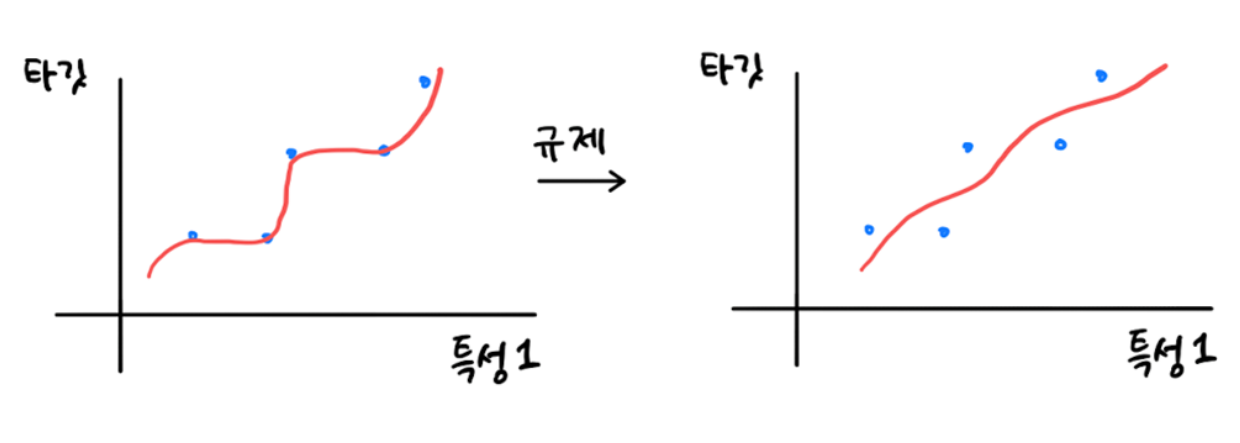

In [40]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 사이킷런 데이터 전처리 스케일 조정 -> 표준점수
# 이전에 평균과 표준편차를 이용하였다면 여기서는 내장된 클래스 사용

ss = StandardScaler() # 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환필수
ss.fit(train_poly)

train_scaled = ss.transform(train_poly) # 훈련용
test_scaled = ss.transform(test_poly)   # 테스트용
#표준점수로 변환한 train_scaled, test_scaled

In [ ]:
# 선형 회귀 모델에 규제를 추가한 모델은 2개가 있다.
# 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제 (선호)
# 라쏘(lasso) : 계수의 절대값을 기준으로 규제를 적용 -> 0으로 제공 가능

In [47]:
# 릿지회귀 : 모델 객체를 만들고 fit() -> score()
from sklearn.linear_model import Ridge

ridge = Ridge() # 릿지 클래스를 객체로 생성하고 변수 연결
ridge.fit(train_scaled, train_target) # fit로 훈련하고 score로 평가함
print(f"훈련용 : {ridge.score(train_scaled, train_target)}")
# 테스트결과 좋은 성능입을 판단할 수 있다. (모델 객체 생성시 alpha 매개변수로 규제의 강도를 조절함)
print(f"시험용 : {ridge.score(test_scaled, test_target)}")

훈련용 : 0.9896101671037343
시험용 : 0.9790693977615387


In [49]:
# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임으로 조절할 수 있다.
# 모델 객체를 만들때 alpha 매개값을 주면 됨
# alpha 값을 크게 주면 강도가 세짐, 계수값을 더 줄이고 조금 더 과소적합되록 유도하는 용도

# 적절한 alpha 값을 찾는 방법은 그래프로 그려 봐야 한다.
import matplotlib.pyplot as plt

train_score = []    # 훈련 :규제의 알파 농도따라서 결과 %를 기록저장용
test_score = []     # 테스트 % 저장용
# alpha 값을 바꿀때 마다 score() 메서드의 결과 값을 저장할 리스트 생성

In [50]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001 ~ 100까지 10배씩 증가
for alpha in alpha_list:    # 리스트 반복용
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target)) # 훈련점수를 리스트에 보관
    test_score.append(ridge.score(test_scaled, test_target))    # 테스트점수를 리스트에 보관
print(f"train_score {train_score}")
print(f"test_score {test_score}")

train_score [0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
test_score [0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


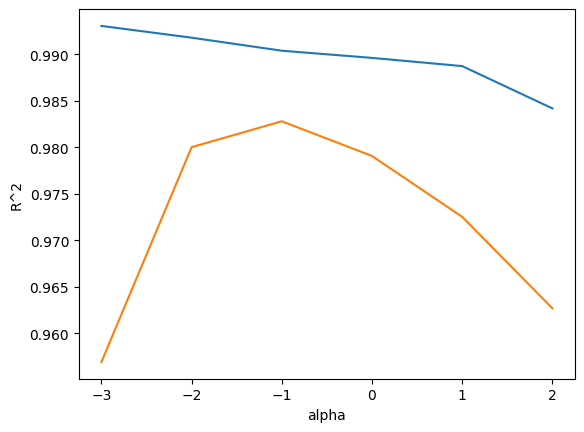

In [51]:
# .log10(alpha_list) x축 값이 너무 촘촘하게 보일까봐 지수형식으로 표현
# 0.001 : -3, 0.01 : -2  0.1 : -1
plt.plot(np.log10(alpha_list), train_score) # 파란색
plt.plot(np.log10(alpha_list), test_score) # 주황색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 0.1 일때 제일 좋은 점수로 파악이 됨

In [55]:
ridge = Ridge(alpha =0.1) # 그래프에서 가장 이상적인 값으로 적용
ridge.fit(train_scaled, train_target) # 훈련

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
new_data = [[30.0,8.0,5.0]]

#다항식 변환 먼저
new_poly = poly.transform(new_data)
# 스케일링
new_scaled = ss.transform(new_poly)

#예측
ridge.predict(new_scaled)

0.9903815817570367
0.9827976465386928


array([331.03196024])